In [160]:
import csv

import pandas as pd
from pandas import DataFrame

import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
from matplotlib import rcParams 

from numpy import arange,array,ones
from scipy import stats


In [153]:
with open('train.csv', 'r') as csvfile:
    trainCSV = csv.reader(csvfile, delimiter = ',')
    
train_raw = pd.read_csv("train.csv", error_bad_lines=False, header = None, delimiter = ',')

train_op = train_raw
train_op.head()


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
1,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59852,0.0,This is such an urgent design problem; kudos t...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59855,0.0,Is this something I'll be able to install on m...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4


In [154]:
train_likes = train_op[40]

train_disagree = train_op[41]

train_target = train_op[1]

train_target = train_target.drop(train_target.index[[0,0]])

train_likes = train_likes.drop(train_likes.index[[0,0]])

train_disagree = train_disagree.drop(train_disagree.index[[0,0]])

train_tar_like = train_op[[1,40]]

train_tar_like = train_tar_like.drop(train_tar_like.index[[0,0]])

train_tar_dis = train_op[[1,41]]

train_tar_dis = train_tar_dis.drop(train_tar_dis.index[[0,0]])


# transfer diff columns of df to lists
target_lst = train_target.values.tolist()

likes_lst = train_likes.values.tolist()

disagree_lst = train_disagree.values.tolist()


In [188]:
# df with target score and likes
train_tar_like_1 = train_tar_like
#train_tar_like_1 = train_tar_like[train_tar_like[1] != '0.0']

# df with only target score 

target_df = train_tar_like_1[1].values.tolist()

target_df = [ float(elem) for elem in target_df ]

target_df = [round(x, 3) for x in target_df]

#df with only likes

like_df = train_tar_like_1[40].values.tolist()

like_df = [ float(elem) for elem in like_df ]



# for disagree & target score
train_tar_dis_1 = train_tar_dis

# disagree only

dis_df = train_tar_dis_1[41].values.tolist()

dis_df = [ float(elem) for elem in dis_df ]

#df with only disagree

#dis_df = train_tar_dis_1[41].values.tolist()


#plt.plot(x=train_tar_lis, y = train_like_lis,linewidth = 2.0)


#train_likes = train_likes.head(100)

#train_likes = train_likes.values.tolist()

#plt.hist(x = train_likes)




SyntaxError: invalid syntax (<ipython-input-188-f9163df09f01>, line 48)

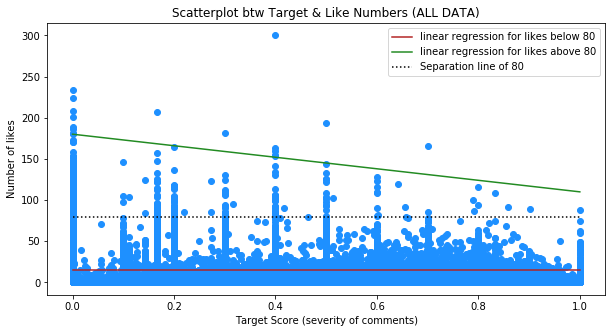

In [196]:
# A general graph:

plt.plot(target_df,  like_df, 'o', c = 'dodgerblue')

#plt.scatter(target_df, dis_df)

plt.xlabel('Target Score (severity of comments)')
plt.ylabel('Number of likes')
plt.title('Scatterplot btw Target & Like Numbers (ALL DATA)')
plt.rcParams['figure.figsize'] = (10,5)

# plot a str line

x = np.linspace(0, 1.0, 1000)
y1 = 15 + x*0
plt.plot(x, y1, color = 'firebrick', label = 'linear regression for likes below 80')

y2 = 180 - x*70
plt.plot(x, y2, color = 'forestgreen', label = 'linear regression for likes above 80')

y3 = 80 + x*0
plt.plot(x,y3, color = 'black', linestyle = ':', label = 'Separation line of 80')

plt.legend()

In [16]:
# create a general pic with target & like (diff cat for high likes or low likes) - 1 scatter with two colors
# create a general pic with target & disagree (diff cat for high likes or low likes) - 1 scatter with two colors
# create a general pic with both like & disagree with target - 1 scatter with two colors
# for likes/disagree: create pic without zero target -- 2 scatter graphs
# plot bar graphs for likes/disagree for zero target seperately - 2 bar graphs

#diff colors or marks for diff cat
# a line if necessary
salmon

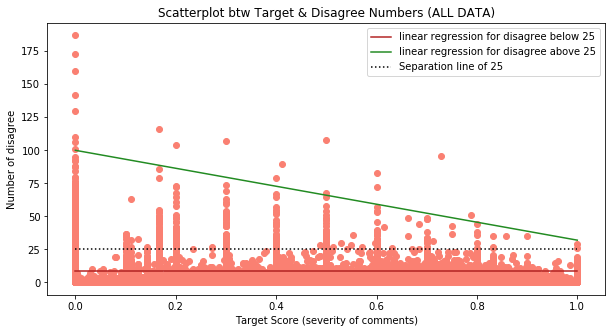

In [199]:
plt.scatter(x = target_df, y = dis_df, c = 'salmon')

plt.xlabel('Target Score (severity of comments)')
plt.ylabel('Number of disagree')
plt.title('Scatterplot btw Target & Disagree Numbers (ALL DATA)')
plt.rcParams['figure.figsize'] = (10,5)

# plot a str line

x = np.linspace(0, 1.0, 1000)
y1 = 9 + x*0
plt.plot(x, y1, color = 'firebrick', label = 'linear regression for disagree below 25')

y2 = 100 - x*68
plt.plot(x, y2, color = 'forestgreen', label = 'linear regression for disagree above 25')

y3 = 25 + x*0
plt.plot(x,y3, color = 'black', linestyle = ':', label = 'Separation line of 25')

plt.legend()

In [140]:
# parse out likes and target for zero_excluded data

train_tar_like_2 = train_tar_like[train_tar_like[1] != '0.0' ]

train_tar_like_2 = train_tar_like_2[train_tar_like_2[1] != '0' ]

train_tar_like_2 = train_tar_like_2[train_tar_like_2[1] != '0.00' ]

target_wout_zero = train_tar_like_2[1].values.tolist()

target_wout_zero = [ float(elem) for elem in target_wout_zero ]

target_wout_zero = [round(x, 3) for x in target_wout_zero]

like_wout_zero = train_tar_like_2[40].values.tolist()

like_wout_zero = [ float(elem) for elem in like_wout_zero ]

# parse out likes and disagree for zero target
## likes

train_tar_like_3 = train_tar_like[train_tar_like[1] == '0.0' ]

like_with_zero = train_tar_like_3[40].values.tolist()

like_with_zero = [ float(elem) for elem in like_with_zero ]

## disagree

train_tar_dis_3 = train_tar_dis[train_tar_dis[1] == '0.0' ]

disagree_with_zero = train_tar_dis_3[41].values.tolist()

disagree_with_zero = [ float(elem) for elem in disagree_with_zero ] 


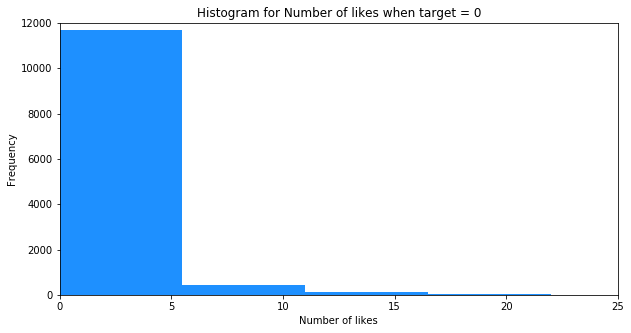

In [150]:
plt.hist(like_with_zero, color = 'dodgerblue')

axes = plt.gca()
axes.set_xlim([0,25])
axes.set_ylim([0,12000])

plt.xlabel('Number of likes')
plt.ylabel('Frequency')
plt.title('Histogram for Number of likes when target = 0')
plt.rcParams['figure.figsize'] = (10,5)

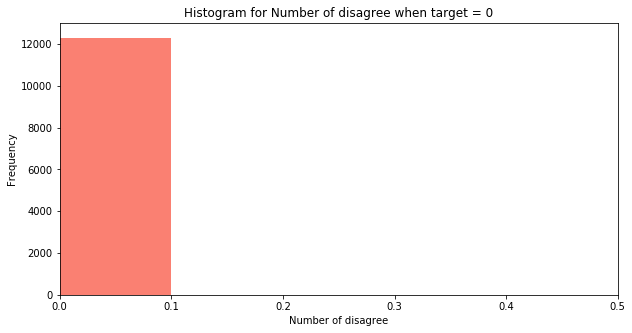

In [148]:
plt.hist(disagree_with_zero, color = 'salmon')

axes = plt.gca()
axes.set_xlim([0,0.5])
axes.set_ylim([0,13000])

plt.xlabel('Number of disagree')
plt.ylabel('Frequency')
plt.title('Histogram for Number of disagree when target = 0')
plt.rcParams['figure.figsize'] = (10,5)